In [1]:
import pandas as pd
import plotly as py
import plotly.graph_objs as go
import pandas as pd
import plotly.express as px
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import re

In [2]:
data = pd.read_csv('Sdf16_1a.txt', sep="\t", low_memory=False)
data = data[["LEAID", "STNAME", "STABBR", "TOTALREV", "TFEDREV", "TOTALEXP"]]
data = data[(data["TOTALREV"] > 0 ) & 
            (data["TOTALEXP"] > 0 ) &
            (data["TFEDREV"] > 0 )]


In [3]:
totalRev = sum(data["TFEDREV"]) - (sum(data["TFEDREV"]) * 15 / 100)
total_rev_cutting = sum(data["TFEDREV"]) * 15 / 100
totalRev, total_rev_cutting

(47261957550.0, 8340345450.0)

In [4]:
data["total_money_left"] = np.minimum(data["TOTALREV"] - data["TOTALEXP"], data["TFEDREV"])

In [5]:
sum(data[data["total_money_left"] > 0]["total_money_left"])

19120754000

In [6]:
data["newTFEDREV"] = data["TFEDREV"]

In [7]:
data = data.sort_values(by=['total_money_left'], ascending=False)

In [8]:
total_model_left_sum = sum(data[data["total_money_left"] > 0]["total_money_left"])

In [9]:
total_model_left_sum

19120754000

In [10]:
percentage = (total_rev_cutting / total_model_left_sum * 100)
percentage = round(percentage, 2)

In [11]:
percentage

43.62

In [12]:
for i, row in data.iterrows():
    if row["total_money_left"] > 0:
        if row["newTFEDREV"] - (row["total_money_left"] * (percentage / 100)) > 0:
            data.at[i,'newTFEDREV'] = row["newTFEDREV"] - (row["total_money_left"] * (percentage / 100))
            data.at[i,'TOTALREV'] = row["TOTALREV"] - (row["total_money_left"] * (percentage / 100))
        else:
            data.at[i,'TOTALREV'] = row["TOTALREV"] - row["newTFEDREV"]
            data.at[i,'newTFEDREV'] = 0
            

In [13]:
data["total_funding_cut"] = data["TFEDREV"] - data["newTFEDREV"]
data["total_money_new_left"] = data["TOTALREV"] - data["TOTALEXP"]

In [14]:
data = data.sort_values(by=['total_funding_cut'], ascending=False)

In [15]:
data['LEAID_CAT'] = data["STABBR"] + data['LEAID'].astype(str)

In [16]:
data.head(5)

LEAID        STNAME STABBR     TOTALREV     TFEDREV    TOTALEXP  \
1904   0622710    California     CA  10048809617  1091400000  9686165000   
3306   1500030        Hawaii     HI   2916613657   261131000  2733094000   
15038  4218990  Pennsylvania     PA   2940821961   271369000  2824311000   
9784   3200060        Nevada     NV   3159833663   277628000  3081183000   
3057   1201440       Florida     FL   2196624936   219981000  2123738000   

       total_money_left  newTFEDREV  total_funding_cut  total_money_new_left  \
1904          643215000   810829617          280570383             362644617   
3306          261131000   147225657          113905343             183519657   
15038         206653000   181226961           90142039             116510961   
9784          139501000   216777663           60850337              78650663   
3057          129278000   163589936           56391064              72886936   

       LEAID_CAT  
1904   CA0622710  
3306   HI1500030  
15038  PA4218990  
9784   NV3200060  
3057   FL1201440

In [17]:
fig = px.bar(data.head(30), x='LEAID_CAT', y='total_funding_cut', 
             hover_data=["LEAID_CAT", "total_funding_cut"]
            )
fig.update_layout(
    title="Top 20 Federal funding cut per Districts",
    xaxis_title="District Leaids",
    yaxis_title="Total Federal Revenue Cut",
    font=dict(
        family="Courier New, monospace",
        size=11,
        color="#000000"
    )
)

fig.show()

In [18]:
fig = px.bar(data, x='STNAME', y='total_funding_cut', hover_data=["LEAID_CAT", "total_funding_cut"],
)
fig.update_layout(
    title="Federal funding cut per States",
    xaxis_title="States",
    yaxis_title="Total Federal Revenue",
    font=dict(
        family="Courier New, monospace",
        size=11,
        color="#000000"
    )
)

fig.show()

In [19]:
race = pd.read_csv("ccd_lea_052_1516_w_1a_011717.csv", sep=",", low_memory=False)

In [20]:
s = {
    "AM" : "All Students - American Indian/Alaska Native",
    "AS" : "All Students - Asian",
    "HI" : "All Students - Hispanic",
    "BL" : "All Students - Black",
    "WH" : "All Students - White",
    "HP" : "All Students - Hawaiian Native / Pacific Islander"
}

In [21]:
columns = ["LEA_NAME", "LEAID","TOTAL", "AM", "AS", "HI", "BL", "WH", "HP"]
race = race[columns]
race = race[race["TOTAL"] > 0]
for c in ["AM", "AS", "HI", "BL", "WH", "HP"]:
    race = race[race[c] > 0]

race['LEAID'] = race['LEAID'].astype(str)

In [22]:
for case in s:
    race[case] = (race[case] * 100  / race["TOTAL"])

In [23]:
merged = data.merge(race, left_on='LEAID', right_on='LEAID', how='inner')

In [24]:
merged["cut"] = merged["total_funding_cut"] > 0

In [25]:
merged_melt = merged.melt(id_vars = 'cut',
                  value_vars = ["AM", "AS", "HI", "BL", "WH", "HP"],
                  var_name = 'columns')

In [26]:
# merged_melt = merged_melt[merged_melt["value"] > 0]

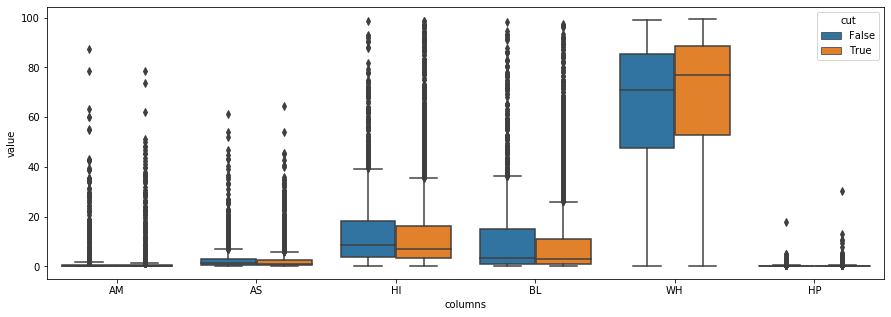

In [44]:
plt.figure(figsize=(15, 5))

sns.boxplot(data = merged_melt,
                hue = 'cut', # different colors for different 'cls'
                x = 'columns',
                y = 'value')
plt.show()


In [45]:
# for col in s:
#     ax = sns.boxplot(x="cut", y=col, data=merged)
#     plt.show()
 t

In [30]:
disablity = pd.read_csv("ccd_lea_002089_1516_w_1a_011717.csv", sep=",", low_memory=False)

In [31]:
disablity = disablity[["LEAID", "SPECED"]]
disablity = disablity[disablity["SPECED"] != -1]
disablity['LEAID'] = disablity['LEAID'].astype(str)

In [32]:
merged = merged.merge(disablity, left_on='LEAID', right_on='LEAID', how='inner')

In [33]:
merged = merged[merged["SPECED"] < merged["TOTAL"]]

In [34]:
merged["SPECED"] = merged["SPECED"] * 100  / merged["TOTAL"]

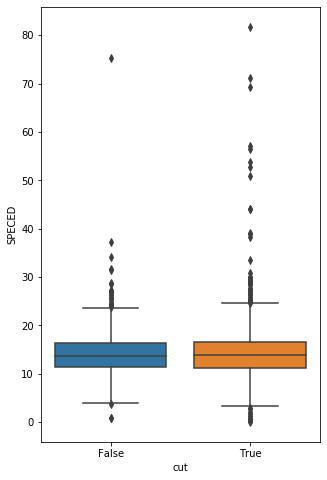

In [51]:
plt.figure(figsize=(5, 8))
ax = sns.boxplot(x="cut", y="SPECED", data=merged)
plt.show()
